<a href="https://colab.research.google.com/github/AndromedaOMA/Advanced_Analytics_with_Apache_Spark---E.On_Software_Development/blob/main/Laboratory_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pregătire mediu de lucru

In [ ]:
from google.colab import drive
# drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Check this site for the latest download link https://dlcdn.apache.org/spark/
!wget -q https://dlcdn.apache.org/spark/spark-3.4.4/spark-3.4.4-bin-hadoop3.tgz
!tar xf spark-3.4.4-bin-hadoop3.tgz
!pip install -q findspark
!pip install pyspark
!pip install py4j
import os
import sys
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/spark-3.4.4-bin-hadoop3"
import findspark
findspark.init()
findspark.find()
import pyspark

from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as f
spark= SparkSession.builder.getOrCreate()
spark

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,604 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,697 kB]
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,844 kB]
Get:13 http://security.ubuntu.com/ubuntu jam

In [ ]:
path = '/content/drive/MyDrive/E.on/E.on_Data/Data/Course_III/customers_cleaned/practice/parquet'
data_df = spark.read.format('parquet').load(path)
data_df.show(n=10, truncate=False)

+--------+------+------------------+-------+-------+----+------------------------------+
|nume    |varsta|ocupatie          |vechime|inactiv|zona|extra                         |
+--------+------+------------------+-------+-------+----+------------------------------+
|Gabriel |44    |Specialist vânzări|21     |NULL   |E   |[5G Router, Sauna, PV]        |
|George  |46    |Agent imobiliar   |25     |false  |G   |[5G Router, 5G Router, WII]   |
|Gheorghe|34    |Specialist HR     |8      |NULL   |D   |[PC, Sauna]                   |
|Grigore |44    |Specialist vânzări|21     |NULL   |E   |[WII, Piscina, Piscina]       |
|Horia   |42    |Arhitect          |18     |NULL   |E   |[Piscina, AC]                 |
|Ilie    |26    |Vânzător retail   |2      |NULL   |B   |[EV]                          |
|Ion     |27    |Vânzător retail   |2      |NULL   |B   |[PS5]                         |
|Ionel   |45    |Inginer civil     |23     |NULL   |G   |[EV, XBOX, 5G Router]         |
|Iosif   |26    |Cont

---

# Spark Core

## Arhitectura Spark

Spark folosește o arhitectură
care se bazează pe o mașină
principală, numită Master, care
prin intermediul unui serviciu,
numit Cluster Manager, dă
ordine către mașinile care vor
executa comenzile, numite
Executor.

În procesul în care este rulat
Spark, numit Spark Driver,
dezvoltatorul va crea un obiect,
fie el în Java, Python, etc.,
numit Spark Context, prin care
librăria de Spark poate trimite
instrucțiunile către executori.

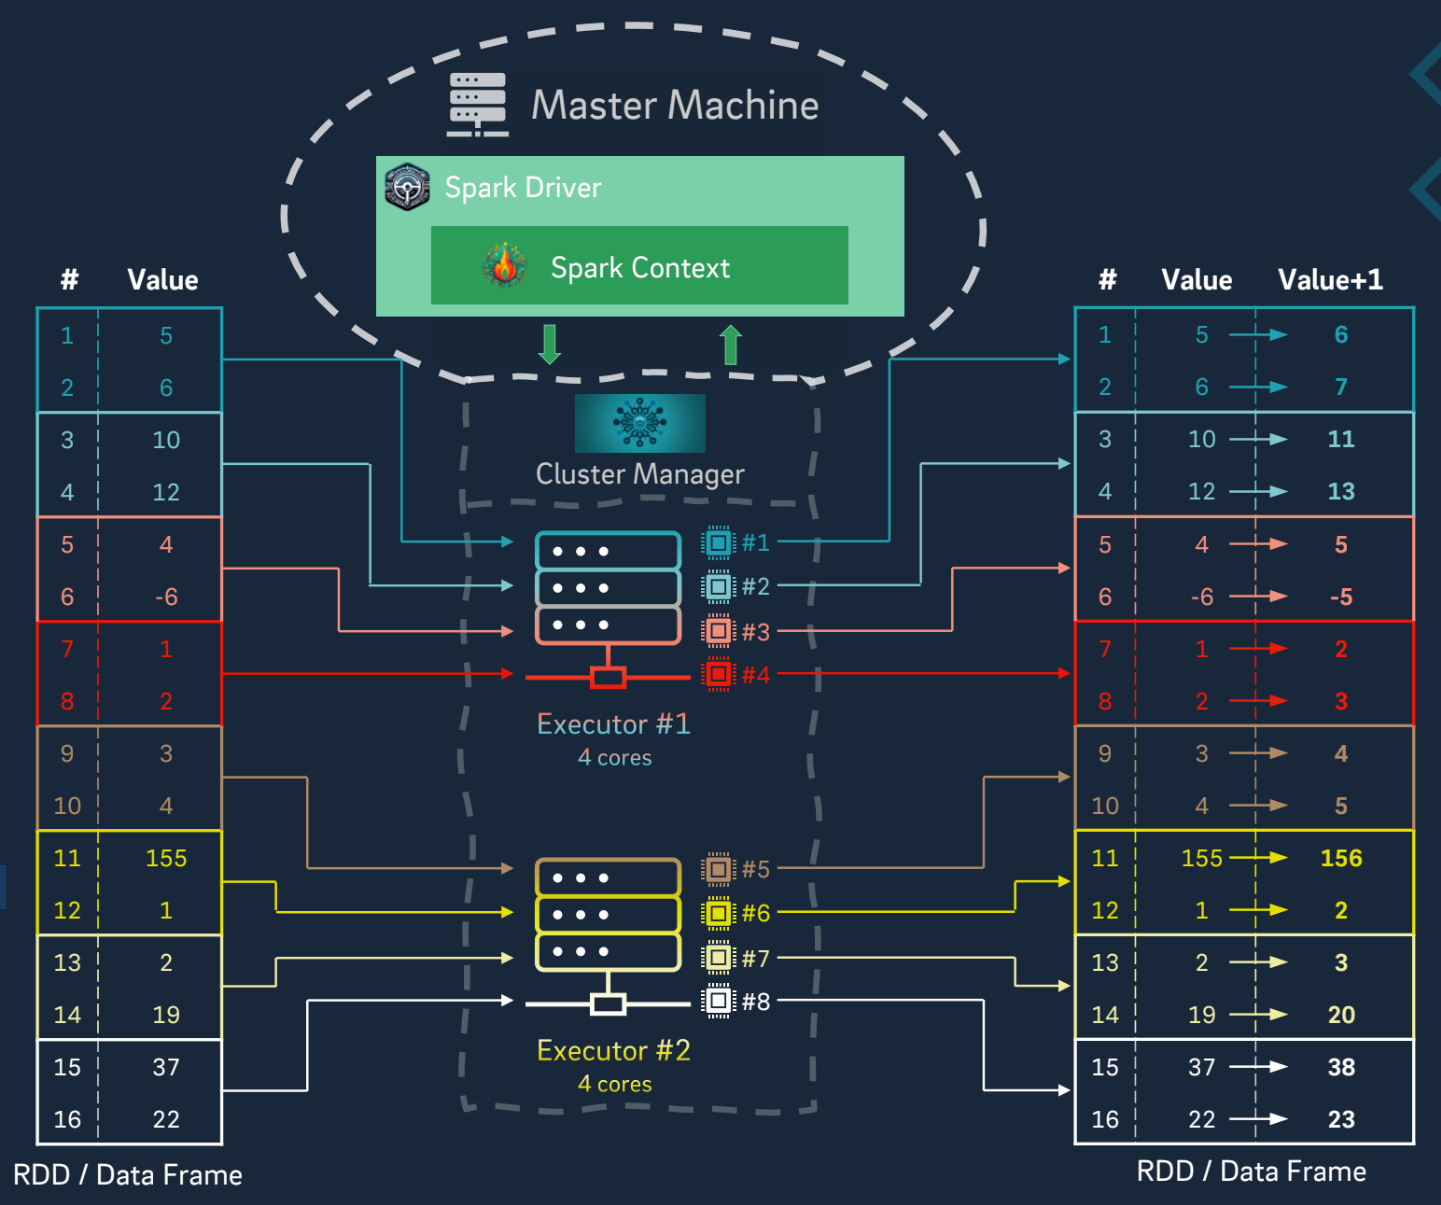

## Spark Core – PySpark

Spark Core este implementarea de bază din Spark. Extensiile precum Spark SQL folosesc această bază pentru a
transmite și monitoriza operațiile de transformare a datelor pe cluster. Poate fi folosită și în mod direct de PySpark.

Spark Core PySpark oferă:
*  Un obiect de tip Spark Context, folosit pentru interacțiunea cu Spark.
*  Un obiect de lucru cu date, numit RDD, oferind o interfață pentru executarea operațiilor Map-Reduce.
*  Funcții gata implementate precum operația de filtrare / ordinare.
*  Abilitatea de a construi propriile funcții de mapare / agregare în Python.
*  Acces direct la partițiile interne ale setului de date.

**Atenție!:**

Spre deosebire de Spark SQL, care suportă direct lucrul cu date semi-structurate sau structurate, precum
JSON, CSV, Parquet, Spark Core este limitat la citirea de date în format text sau binar.


## Spark Context

Spark Context este un obiect de Python oferit de librăria PySpark pentru Spark. Numai folosind acest obiect
putem accesa tot ce oferă librăria. Orice extensie Spark folosește la bază acest obiect.

Obiectul se creează astfel:

In [ ]:
from pyspark import SparkConf
from pyspark.context import SparkContext

sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

Se pot modifica și setările interne la crearea sesiunii dacă dorim:

In [ ]:
# from pyspark import SparkConf, SparkContext
# from pyspark.sql import SparkSession

# conf = SparkConf()
# conf.set('spark.driver.memory', '3g')

# sc = SparkContext('local[*]', 'My App', conf=conf)
# =====================================================
# from pyspark.sql import SparkSession, SparkConf
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession

# Get the existing SparkConf from the active SparkSession
conf = spark.sparkContext.getConf()

# Set the desired driver memory
conf.set('spark.driver.memory', '3g')

# Instead of creating a new SparkContext, get the existing one:
sc = spark.sparkContext

Dacă avem mai multe setări, adăugăm la lanț câte un apel la funcția config pentru fiecare setare. O listă cu toate
opțiunile disponibile găsiți la https://spark.apache.org/docs/latest/configuration.html sau o căutare pe Google.

## RDD - Resilient Distributed Dataset

Spark Core folosește un tip de obiect, numit RDD, pentru a gestiona un set de date. Acest obiect RDD reprezintă
defapt o listă de obiecte, fie ele text, numere sau chiar alte liste (recomandat să fie cu același număr de valori).

Crearea unui RDD Spark dintr-
o listă de liste Python. În acest
caz, toate rândurile vor fi liste
cu același număr de valori.

In [ ]:
data = [
['Vali', 23, 'Programator', 4, None, 'A', ['Sport', 'Boardgames']],
['Vlad', 34, 'Instalator', 11, None, 'B',['Alergare']],
['Bea', 29, 'Reporter', 7, True, 'B', None]
]
data_df = sc.parallelize(data)

Fiind concepute pentru Big Data, un RDD nu încarcă datele. El reține doar locația datelor. La fiecare operație de
transformare (map / reduce) de date, un nou RDD va fi creat care reține locația și tipul rândului, precum și lanțul de
transformări. Transformările vor fi efectuate doar în momentul scrierii sau colectării datelor de către executori.

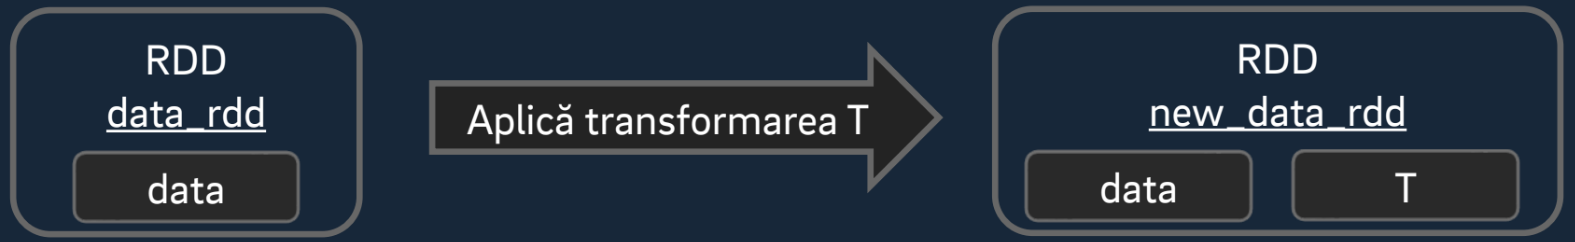

## Citirea Datelor

În Big Data, în general, datele sunt stocate extern în unul sau mai multe formate. PySpark Spark Core oferă
metode pentru citirea datelor în format binar / text pe care dezvoltatorul le poate ulterior parsa.

Citirea unui fișier text. O linie a fișierului / rând din RDD:

In [ ]:
data_rdd = sc.textFile('/path/to/text/file')

Citirea fișierelor unui folder. Un întreg fișier / rând din RDD:

In [ ]:
data_rdd = sc.wholeTextFiles('/path/to/text/file')

De asemenea, fișierul sau fișierele unui folder pot fi citite și în format binar direct.

Citirea unui fișier / folder direct în format binar. Un întreg fișier / rând din RDD:

In [ ]:
data_rdd = sc.binaryFiles('/path/to/file/or/folder')

Spark Context are multe funcții pentru diverse operații. O listă cu toate opțiunile disponibile găsiți la
https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.SparkContext.html#pyspark.SparkContext.

## Data Frame – Colectarea Datelor

De multe ori ne găsim în situația în care este nevoie să depanăm procesul de transformare a datelor. Așadar, Spark
ofertă metode de colectare a datelor pentru acest scop, dar și pentru prelucrarea ulterioară cu alte librării.

* Pentru a colecta datele într-o listă de Python, folosim:

In [ ]:
data_list = data_rdd.collect()

* Pentru a colecta datele într-un dicționar atunci când rândurile au doar două elemente:

In [ ]:
data_pandas_pdf = data_df.collectAsMap()

**Atenție!**

 Datele sunt transferate mai întâi de la executori pe Spark Driver la colectare. Dacă sunt prea multe
date, există pericolul ca procesul de Spark Driver să nu mai facă față și să fie terminat de către sistem.

## Scrierea Datelor

În Big Data, după procesare, datele sunt stocate. PySpark Spark Core oferă metode pentru scrierea în diverse
formate de stocare de nivel jos, precum text.

* Scrierea fișierelor în format text:

In [ ]:
data_rdd.saveAsTextFile('/path/to/save/folder/')

Fiecare partiție de date va fi scrisă în câte un fișier. Fiecare rând din partiție va fi scris pe câte o linie din fișier.
Valorile rândului vor fi scrise despărțite prin spații.

Se pot scrie și formate mai sofisticate, formatul Pickle, foarte utilizat în cadrul Python:

* Scrierea fișierelor în format Pickle:

In [ ]:
data_rdd.saveAsPickleFile('/path/to/save/folder')

OBS: RDD-urile au mai multe funcții pentru scrierea datelor. O listă cu toate opțiunile disponibile găsiți la
https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.RDD.html.

## Maparea Datelor - Map

Principalele metode de transformare a RDD-urilor sunt metodele din paradigma Map-Reduce precum operația map.

* Operația de Mapare / rând – Aplicarea unui funcții asupra fiecărui rând (Un nou obiect de tip RDD este returnat care transformă fiecare rând după funcția furnizată. RDD-ul de la care
a pornit maparea va rămâne neschimbat.)

In [ ]:
new_data_rdd = data_rdd.map(lambda x: (x[0], x[1] + 1, x[6]))
print(data_rdd.collect())
print(new_data_rdd.collect())

## Maparea Datelor – Flat Map

Spark Core oferă și o metodă de mapare care permite funcției furnizate să returneze mai multe rânduri.

Operația de Mapare / un rând la mai multe rânduri – Aplicarea unui funcții asupra fiecărui rând: (Un nou obiect de tip RDD este returnat format din rândurile returnate de funcția furnizată. RDD-ul de la care
a pornit maparea va rămâne neschimbat. În acest caz, fiecare rând va returna câte două rânduri.)

In [ ]:
new_data_rdd = data_rdd.flatMap(lambda x: [ (x[0], x[1] + 1, consumer) for consumer in (x[6] or []) ])
print(data_rdd.collect())
print(new_data_rdd.collect())

## Pair RDD - Resilient Distributed Dataset Key-Value

Pentru a putea efectua operațiile de shuffle / reduce, trebuie specificat pentru fiecare rând o câte o cheie de grupare.
Așadar, din design-ul Spark, metodele de shuffle și reduce pot fi executate doar pe RDD-uri ale căror rânduri sunt
liste / tuple formate din două valori, prima valoare fiind considerată cheia, iar a doua datele, o valoare / listă de valori.

Folosirea operației Map pentru a converti fiecare rând la o listă / tupla de două elemente: (Un nou obiect de tip RDD este returnat format din rânduri a câte două valori, prima fiind valoarea coloanei 5
din fiecare rând și a doua fiind datele originale. RDD-ul de la care a pornit maparea va rămâne neschimbat.)

In [ ]:
pair_rdd = data_rdd.map(lambda x: (x[5], x))
print(pair_rdd.collect())

## Reducerea Datelor – Reduce - Shuffle & Agregări

Operația completă de reduce compresează valorile cu aceeași cheie la un singur rând. Această funcție repartiționează
setul de date, grupând datele ce necesită reduse împreuna în aceeași partiție, după aplică funcția de reduce.

Operația de Reduce – Agregarea unui grup într-un singur rând: (Este returnat un nou Pair RDD, unde prima valoare din fiecare rând este cheia, iar a doua valoare este
rezultatul apelării funcției mai întâi pe valoarea inițială, în acest caz zero, și un rând din grup, apoi pe rezultat și
al doilea rând din grup, ș.a.m.d. Metoda foldByKey poate fi apelată doar pe Pair RDD-uri.)

In [ ]:
new_data_rdd = pair_rdd.foldByKey(0, lambda aggregation_now, next_row: aggregation_now + next_row[1])
print(pair_rdd.collect())
print(new_data_rdd.collect())

Spark mai întâi combină toate datele cu aceeași cheie care se află deja în aceleași partiții, apoi repartiționează
datele după cheie și combină rezultatele. În acest mod, se reduce numărul de date transferate la repartiționare.

## Reducerea Datelor – Shuffle

Spark Core nu constrânge dezvoltatorul doar la operații de Map-Reduce. Este oferită și o metodă care doar
repartiționează setul de date, grupând datele ce necesită reduse împreuna în aceeași partiție.

Operația de Reconfigurare a Partițiilor – Repartiționarea datelor după valoarea cheie: (Un nou obiect de tip RDD este returnat, cu numărul de partiții specificat. Rândurile cu aceeași valoare cheie
vor fi mutate în aceeași partiție. Metoda poate fi apelată doar pe Pair RDD-uri întrucât se bazează pe cheie.)

In [ ]:
repartitioned_pair_rdd = pair_rdd.partitionBy(2)

Operația de Reconfigurare a Partițiilor – Repartiționarea datelor în mod aleatoriu: (Un nou obiect de tip Data Frame este returnat cu numărul de partiții specificat, rândurile fiind distribuite în
mod aliator, dar echilibrat, la partiții. Metoda poate fi apelată pe orice fel de RDD. Metoda coalesce combină
partițiile existente, așadar poate fi apelată doar dacă se dorește micșorarea numărului de partiții a datelor.)

In [ ]:
new_data_df = data_rdd.repartition(2)
new_data_df = data_rdd.coalesce(1)

## Maparea și Reducerea Datelor – Map Partition

Cea mai flexibilă operație oferită de Spark Core este operația de mapare a partițiilor. Folosind această metodă, se
poate transforma câte o partiție odată, sau în combinație cu partiționarea, se poate folosi pentru a agrega datele.

Operația de Mapare a unei partiții – Comprimarea partiției într-un singur rând: (Un nou obiect de tip Data Frame este returnat cu rândurile rezultate prin aplicarea funcției per fiecare partiție.
Majoritatea metodelor de map (map / flatMap / reduce) se foloseste de această metodă.)

In [ ]:
new_data_rdd = data_rdd.mapPartitions(lambda rows: [(x[0], x[1], x[5]) for x in rows])
data_df.show()
new_data_df.show()

## Un program simplu PySpark Spark Core


In [ ]:
# Pas 1: Create porții de acces către Spark SQL, Sesiune Spark
from pyspark import SparkContext; import json
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

# Pas 2: Citirea fișierelor de într-un Data Frame
data_rdd = sc.wholeTextFiles('/path/to/course/data/json/folder')

# Pas 3: Extragerea zonei și a consumatorilor
pair_rdd = data_rdd.flatMap(lambda x: [(json.loads(r)['zona'], json.loads(r).get('extra')) for r in x[1].splitlines()])

# Pas 4: Calcularea numărului de consumatori declarați per zonă
final_data_rdd = pair_rdd.foldByKey(0, lambda aggregation, next_value: aggregation + len(next_value or []))

# Pas 5: Scrierea datelor finale într-un folder
final_data_rdd.saveAsTextFile('/path/to/save/folder')

## RDD – View și Lineage

Un RDD este defapt un „View”, similar cu cel din bazele de date SQL, asupra datelor.

Într-un astfel de obiect, se
reține doar de unde provin datele și operațiile care trebuie efectuate, numite Planul Logic de Execuție.

**O vedere internă a unui RDD -> Planul Logic de Execuție:**
* Citirea datelor în text din /path/to/course/data/json/folder
* Transformarea unui rând în mai multe folosind funcția dată
* Grupare după cheie și agregare folosind funcția dată

Calculele vor fi efectuate doar în momentul accesării acestui „View”, adică atunci când dorim să le scriem, afișăm
sau colectăm. În acel moment, mașina Master va trimite „comenzile”, Planul de Execuție Fizic al RDD-ului, la
executori, care îl vor efectua.

**O vedere internă a unui RDD -> Planul Fizic de Execuție:**
* Citirea datelor în text din /path/to/course/data/json/folder
* Transformarea unui rând în mai multe folosind funcția dată
* Grupare după cheie și agregare folosind funcția dată
* Scrieți datele la /path/to/save/folder

## RDD – Imutabilitate


Întrucât un „View”, RDD, nu poate fi modificat, toate funcțiile de transformare din PySpark întotdeauna vor returna
un „View” nou, adică un nou RDD, clonă a celui anterior dar la care se adaugă noua transformare.

**RDD-ul inițial:**
* Citirea datelor în text din /path/to/course/data/json/folder
* Transformarea unui rând în mai multe folosind funcția dată

**RDD-ul după o operație de transformare:**
* Citirea datelor în text din /path/to/course/data/json/folder
* Transformarea unui rând în mai multe folosind funcția dată
* Grupare după cheie și agregare folosind funcția dată

Defapt, nici o funcție din Spark nu permite modificarea unui obiect de tip RDD. Odată creat, un obiect de RDD nu
mai poate fi modificat!

OBS: Această proprietate se numește în programare proprietatea de imutabilitate.`

---

# From Core to SQL and Back

## Data Frame -> Map-Reduce – Operațiile de transformare



Toate operațiile de transformare din ce pot fi aplicate peste un Data Frame din Spark SQL sunt în spate
efectuate folosind operația de map din Map-Reduce.

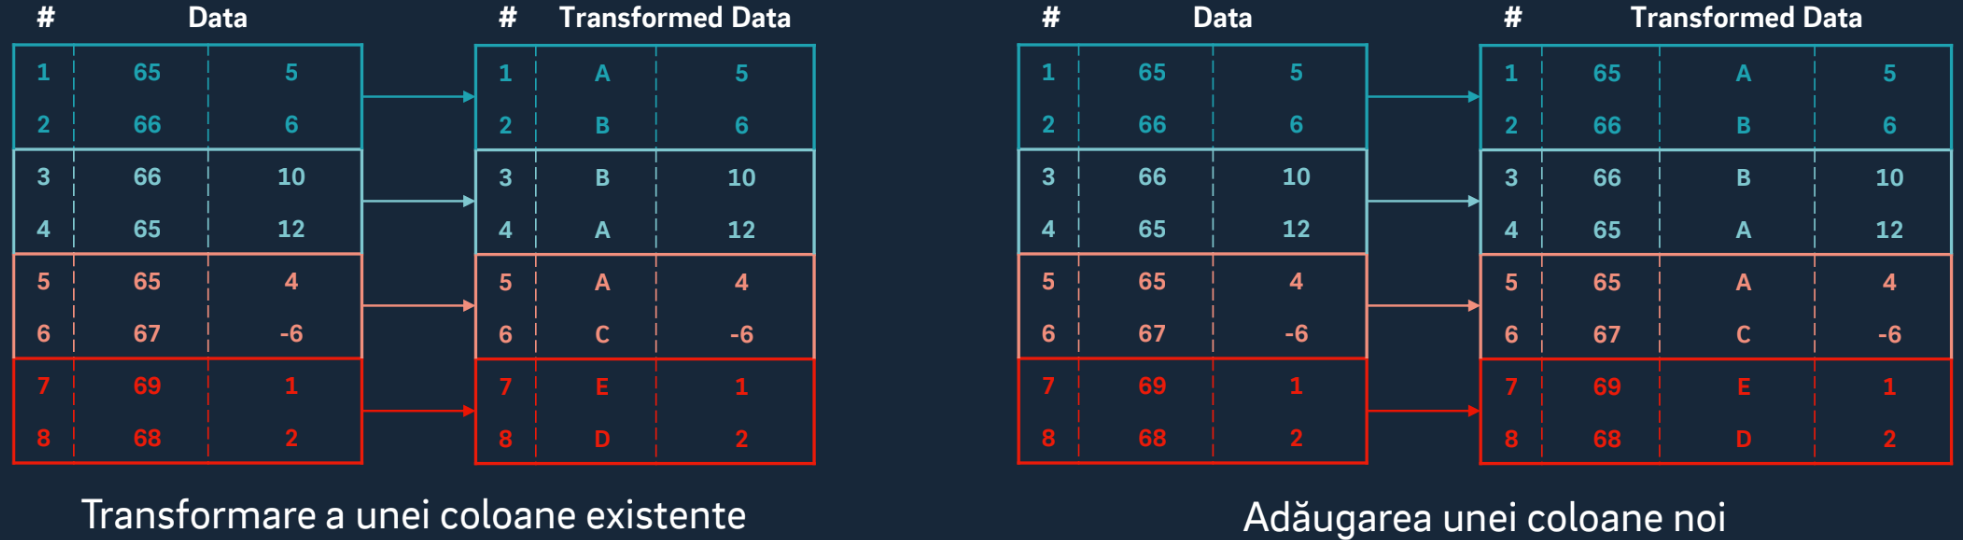

Când Spark SQL utilizează expresii și nu funcții definite de dezvoltator, codul de mapare nu numai că este generat
direct în limbajul nativ Spark, dar și transformările consecutive sunt combinate în aceeași operație, sporind eficiența.

## Data Frame -> Map-Reduce – Operațiile de filtrare / expandare


Operațiile de filtrare și cele de explozie ce pot fi aplicate peste un Data Frame din Spark SQL sunt și ele în spate
efectuate folosind operația de map din Map-Reduce.

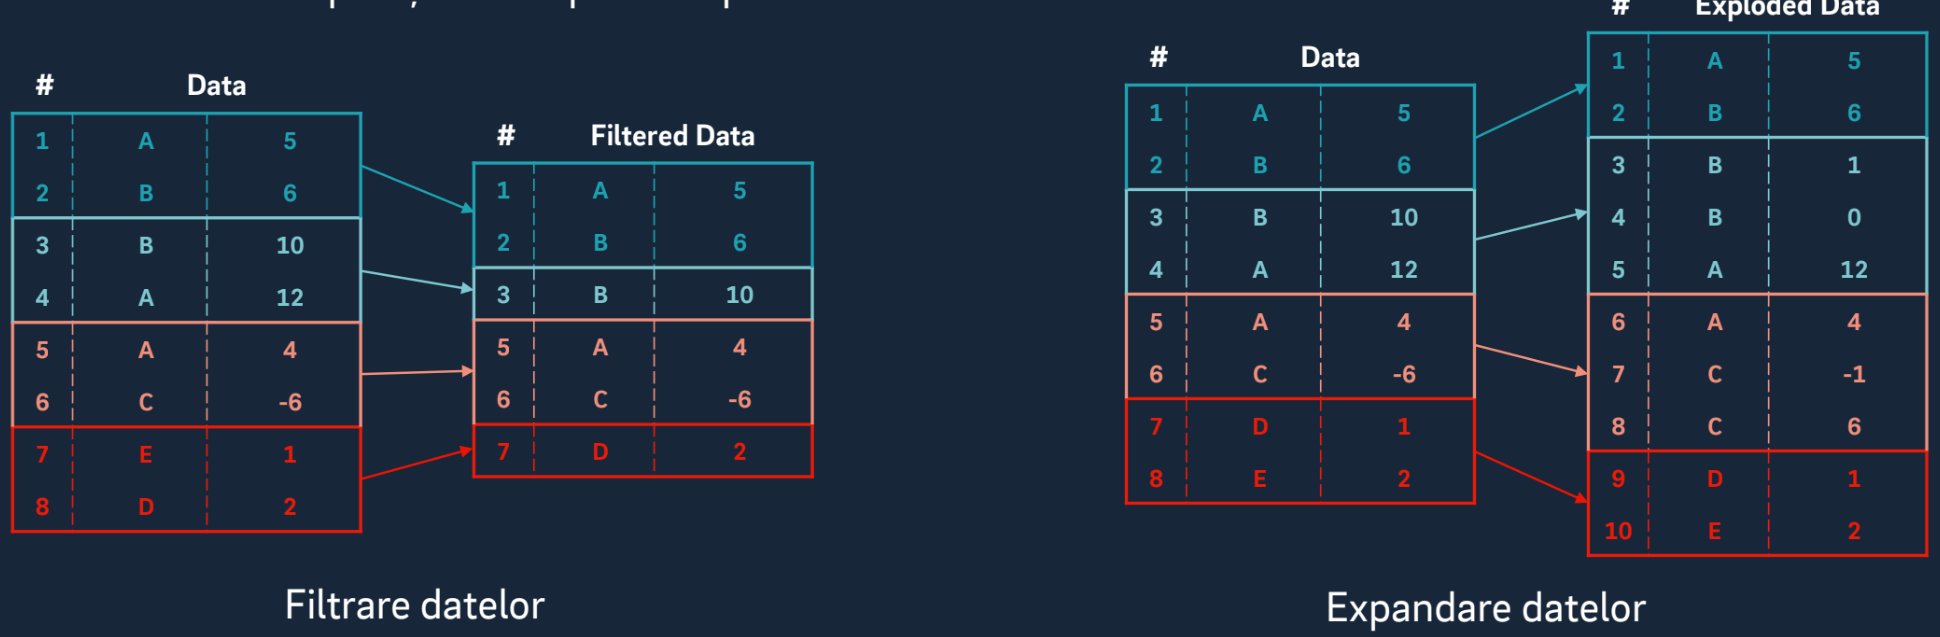

Precum transformările de date, codul de mapare a filtrărilor și expandărilor nu numai că este generat direct în
limbajul nativ Spark, dar operațiile sunt și combinate cu alte transformări în aceeași funcție, sporind eficiența.

## Data Frame -> Map-Reduce – Operațiile de grup

Operațiile de grupare, operația premergătoare agregărilor și funcțiilor window din Spark SQL, sunt în spate efectuate
folosind operația de reduce din Map-Reduce, iar operațiile de agregare sau window folosind operația de map.

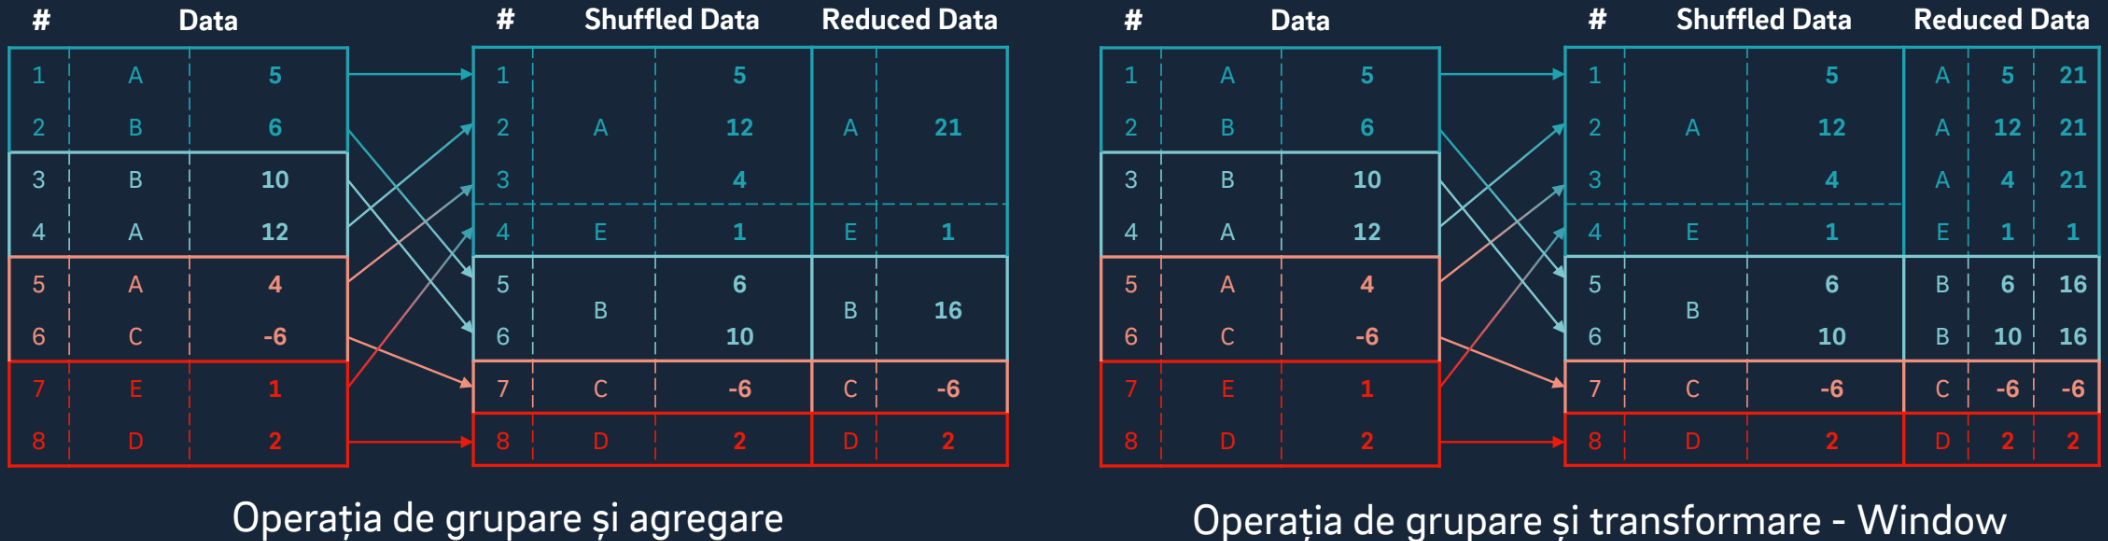

Când Spark SQL utilizează expresii și nu funcții definite de dezvoltator, codul de agregare este generat direct în
limbajul nativ Spark, sporind eficiența. Operația de grupare în sine se folosește de repartiționarea din Spark Core.

## Data Frame -> Map-Reduce – Operațiile de asociere

Operația de asociere din Spark SQL este în spate efectuată folosind operația de reduce din Map-Reduce, aplicată pe
fiecare set de date în parte, iar apoi folosind operația de mapare pe perechile de partiții care conțin aceeași chei.

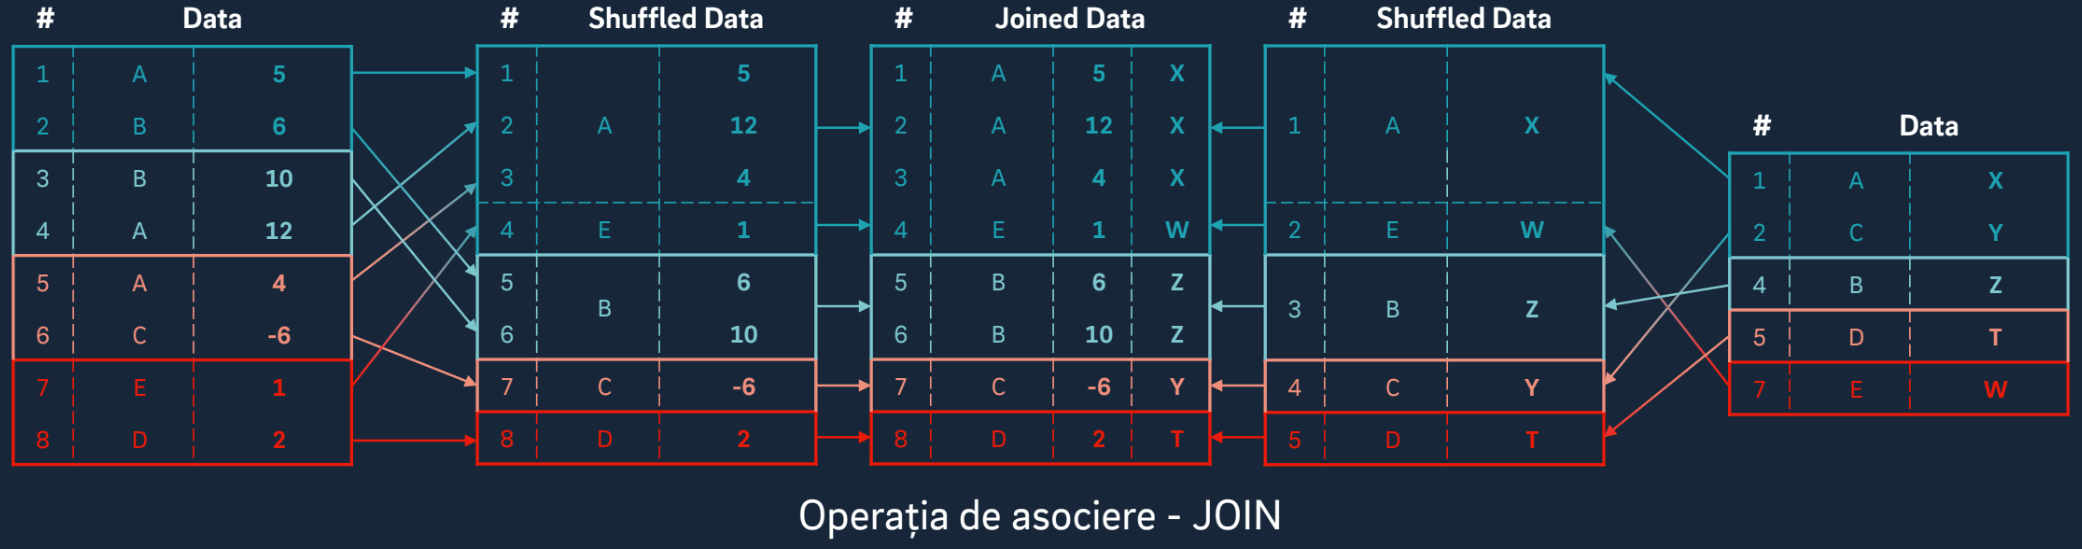


Când Spark SQL utilizează expresii și nu funcții definite de dezvoltator, codul de join este generat direct în limbajul nativ
Spark, sporind eficiența. Ambele seturi de date vor fi repartiționate în același număr de partiții și cheile plasate similar.

## Data Frame -> RDD

Fiind o extensie a Spark Core, și implementând operații care pot fi translatate în operații de Map-Reduce, Spark
SQL permite ca lanțul de operații al unui Data Frame să fie convertit într-un lanț de comenzi RDD direct.

Crearea și accesarea unui obiect de tip RDD dintr-un Data Frame: (Un nou obiect de tip RDD este returnat format din lanțul de comenzi al Data Frame-ului. Obiectele din RDD
vor fi de tip-ul intern Row. Data Frame-ul de la care a pornit proiecția va rămâne neschimbat.)

In [ ]:
data_rdd = data_df.rdd
print(data_rdd.collect())

**Atenție!**

Orice cod generat de Spark SQL în limbajul nativ Spark va fi convertit în metode Python, reducând eficiența operațiilor.

## RDD -> Data Frame



Pe de altă parte, lanțul de comenzi a unui RDD nu poate fi întotdeauna convertit la un lanț de comenzi Data Frame
întrucât nu toate operațiile aplicabile pe RDD-uri pot fi translatate și nu este garantată o schemă a datelor, dar
datele după rularea lanțului de comenzi al RDD-ului pot fi folosite pentru crearea unui Data Frame nou.

Crearea unui Data Frame prin parsarea datelor și validarea schemei din datele unui RDD: (Este returnat un nou Data Frame, format prin parsarea / validarea fiecărei partiție a RDD-ului și păstrarea lor
în exact aceeași configurație. RDD-ul de la care a pornit proiecția va rămâne neschimbat.)

In [ ]:
data_df = spark.createDataFrame(data_rdd, schema=['nume', 'varsta', 'ocupatie', 'vechime', 'inactiv', 'zona', 'extra'])
data_df.show()

---

# Spark ML


PySpark ML este librăria de Apache Spark ML pentru Python. Este foarte similară cu populara librărie Sklearn,
oferind o structură similară de apelare în două etape. Ea a fost concepută pentru a oferi oricărei persoane
capabilitatea de a efectua aplica algoritmi de învățare automată pe date.

PySpark ML oferă:

1. Un tip de coloană nou, pentru a lucra cu atributele datelor, numită Vector.
2. O clasă pentru construirea coloanelor de tip Vector.
3. Diverse clase pentru standardizarea datelor.
4. Diverse clase pentru modele de învățare automată.

Codul PySpark ML este unul foarte simplu și foarte intuitiv, întrucât complexitatea este în ce facem cu datele.


## Modele de Învățare Automată

PySpark ML oferă clase de Python care implementează modele cunoscute de învățare automată. Fiecare model are
parametrii săi unici, dar toate implementează o interfață de apelare comună care se regăsește și în librăria sklearn.

Interfața unui model care necesită antrenare pe date.

In [ ]:
class MLModel:
  # Parametrii modelor care necesită antrenare din Spark ML pot fi specificați fie la inițializare, fie prin utilizarea metodelor dedicate de configurare, întrucât modelele adoptă șablonul de builder.
  # model = MLModel().setVal1(3).setVal2('input')
  # model = MLModel(val1=3).setVal2('input')
  def __init__(self, val1=None , val2=2):
  def setVal1(self, new_value):
  def setVal2(self, new_value):

  ...
  # Modelele de învățare automată implică o fază de antrenare pe date. Pentru acest scop este oferită funcția fit. Aceasta va antrena modelul pe date și va returna un model antenat.
  def fit(self, data_df):

## Modele de Transformare

Modelele antrenate și modele care nu necesită o etapă de antrenare implementează și ele o interfață de apelare
comună, care se regăsește și în librăria sklearn, în general utilizată pentru transformarea ulterioară a datelor.

In [ ]:
class PySparkMLModelInterface:
  # Parametrii modelor care nu necesită antrenare din Spark ML pot
  # fi specificați fie la inițializare, fie prin utilizarea metodelor dedicate
  # de configurare, întrucât modelele adoptă șablonul de builder.
  # model = MLModel(val1=3).setVal2('input')
  def __init__(self, val1=None , val2=2):
  def setVal1(self, new_value):

  ...
  # Pentru rularea modelului pe date, există funcția transform.
  # Aceasta va aplica operațiile necesare rulării modelului pe Data
  # Frame-ul furnizat și va returna un nou Data Frame.
  def transform(self, data_df):

  # Toate modelele includ metoda save pentru stocarea
  # modelului pe disk și metoda load pentru încărcarea unui
  # model salvat anterior.
  def save(self, path):
  def load(self, path):

## Transformarea datelor



Majoritatea algoritmilor de învățare automată pot lucra numai pe date numerice. Pentru a extrage o informație
numerică din o coloană text, Spark ML oferă un model care convertește valorile text în funcție de frecvența lor în date.

Antrenarea modelului care extrage informația numerică dintr-o coloană text: (Un nou model antrenat este returnat care poate asigna valorilor din coloana „ocupatie” o valoare în noua
coloană „ocupatie_idx” bazat pe frecvența valorii în datele de antrenament, începând de la 0.)

In [ ]:
from pyspark.ml.feature import StringIndexer
string_indexer = StringIndexer(inputCol='ocupatie', outputCol='ocupatie_idx', stringOrderType='frequencyDesc')
trained_string_indexer = string_indexer.fit(data_df)

Mai multe informații privind parametrii și comportamentul modelului se găsesc la:
https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.feature.StringIndexer.html.

## Conversia textului: StringIndexer – Antrenarea Modelului


Majoritatea algoritmilor de învățare automată pot lucra numai pe date numerice. Pentru a extrage o informație
numerică din o coloană text, Spark ML oferă un model care convertește valorile text în funcție de frecvența lor în date.

Antrenarea modelului care extrage informația numerică dintr-o coloană text: (Un nou model antrenat este returnat care poate asigna valorilor din coloana „ocupatie” o valoare în noua
coloană „ocupatie_idx” bazat pe frecvența valorii în datele de antrenament, începând de la 0.)

In [ ]:
from pyspark.ml.feature import StringIndexer
string_indexer = StringIndexer(inputCol='ocupatie', outputCol='ocupatie_idx', stringOrderType='frequencyDesc')
trained_string_indexer = string_indexer.fit(data_df)


Mai multe informații privind parametrii și comportamentul modelului se găsesc la:
https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.feature.StringIndexer.html.

## Conversia textului: StringIndexer – Transformarea datelor


Modelul antrenat anterior poate fi folosit ori pe aceleași date, ori pe alte date de test pentru a transforma coloana text
într-o coloană de tip numeric pentru a fi folosită ulterior de alte modele de învățare automată.

Extragerea de informație numerică dintr-o coloană text folosind modelul antrenat. (Precum metodele Data Frame-urilor, un nou obiect de tip Data Frame este returnat, în acest caz având coloana
„ocupatie_idx” adăugată sau actualizată cu o valoare bazată pe frecvența valorii în date.)

In [ ]:
data_string_indexed_df = trained_string_indexer.transform(data_df)
transformed_data_df.show()

## Tipul de date și coloană Vector


Anumite modele PySpark ML, pentru a eficientiza memoria folosită în timpul antrenării / rulării, folosesc un tip
special de date, Vector. Ea reprezintă o listă de valori numerice (vector în mai multe dimensiuni) reținută eficient.

PySpark oferă funcții speciale pentru a inițializa o variabilă vector. Toate se află în același clasă de Python.

In [ ]:
from pyspark.ml.linalb import Vectors

Vector Dens – Un vector standard în n dimensiuni

In [ ]:
vector = Vectors.dense(0.0, 5.0, 7.0)

Vector Rar – Un vector care doar elementele non-zero, economisind memorie când majoritatea valorilor sunt zero.

In [ ]:
vector = Vectors.sparse(5, 0.0, 5.0, 7.0, 0.0, 0.0)

OBS: Unele modele folosesc intern acest tip de date pentru a reține coeficienții modelelor antrenate. Se pot construi și
coloane de Data Frame cu acest tip de date pentru a fi folosit sau returnat de anumite modele din PySpark ML.

## Conversia textului: CountVectorizer – Antrenarea Modelului


Datorită eficienței tipului Vector, modelele care calculează liste de valori preferă acest format pentru returnare. Un
astfel de model este cel care determină frecvența fiecărei valori unice într-o coloană.

Antrenarea modelului care extrage numărul de apariții a unui valori dintr-o listă de valori: (Un nou model antrenat este returnat care poate contorizează numărul de apariții a fiecărei valori din coloana
„extra” (nu se acceptă NULL) și construiește o nouă coloană „consumatori” de tip Vector cu aceste valori.)

In [ ]:
from pyspark.ml.feature import CountVectorizer
count_vectorizer = CountVectorizer(inputCol='extra', outputCol='consumatori', vocabSize=3)
trained_count_vectorizer = count_vectorizer.fit(data_df.withColumn('extra', f.coalesce('extra', f.array())))

Mai multe informații privind parametrii și comportamentul modelului se găsesc la:
https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.feature.CountVectorizer.html .

## Conversia textului: CountVectorizer – Transformarea datelor

Modelul antrenat anterior poate fi folosit ori pe aceleași date, ori pe alte date de test pentru a transforma coloana
extra într-o coloană de tip vector pe conținând numărul de apariției fiecărei valori.

Extragerea numărului de apariții a unui valori dintr-o listă de valori folosind modelul antrenat: (Precum metodele Data Frame-urilor, un nou obiect de tip Data Frame este returnat, în acest caz având coloana
„consumatori” adăugată sau actualizată, de tip Vector Rar, cu o valoare bazată pe frecvența valorii în date.)

In [ ]:
data_string_indexed_df = data_string_indexed_df.withColumn('extra', f.coalesce('extra', f.array()))
data_with_value_counts_df = trained_count_vectorizer.transform(data_string_indexed_df)
data_with_value_counts_df.show()

## Pregătirea datelor de intrare: VectorAssembler



Pentru a crea o coloană de tipul Vector, PySpark ML oferă modele de transformare pentru acest scop. Coloana este
folosită ulterior de alte modele de învățare automată care necesită acest tip de date la intrare.

Un model pentru concatenarea coloanele existente într-un Vector pentru a fi folosit de modele ulterioare: (Un nou obiect de tip Data Frame este returnat care are adăugată sau actualizată coloana „atribute”, de tip
Vector, care va reține o listă formată din valorile coloanelor „varsta”, „ocupatie_idx” și „vechime”.)

In [ ]:
from pyspark.ml.feature import VectorAssembler
vector_assembler = VectorAssembler(inputCols=['varsta', 'ocupatie_idx', 'consumatori'], outputCol='atribute')
data_vectorized_df = vector_assembler.transform(data_with_value_counts_df)
data_vectorized_df.show()

## Conversia textului: KMeans – Antrenarea Modelului



Cele mai multe modele de învățare automată necesită la intrare o coloană de tip Vector, fiind proiectate să lucreze cu
date multidimensionale, și, dacă este cazul, returnează rezultatul la ieșire o coloană de același tip.

Antrenarea modelului de învățare automată de clusterizare KMeans: (Un nou model antrenat de KMeans este returnat care pe baza clusterelor sale poate asigna, pe baza valorilor
din coloana „atribute”, indicele celui mai apropriat cluster într-o nouă coloană „cluster”.)

In [ ]:
from pyspark.ml.clustering import KMeans
kmeans = KMeans(featuresCol='atribute', predictionCol='cluster', maxIter=10, k=2)
trained_kmeans = kmeans.fit(data_vectorized_df)

Mai multe informații privind parametrii și comportamentul modelului se găsesc la:
https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.clustering.KMeans.html .

## Conversia textului: KMeans – Transformarea datelor

Modelul antrenat anterior poate fi folosit ori pe aceleași date, ori pe alte date de test pentru a calcula folosind valorile
din coloana „atribute” indicele celui mai apropriat dintre clusterele calculate la pasul de antrenare din date.

Asignarea datelor de intrare la un cluster folosind modelul antrenat: (Precum metodele Data Frame-urilor, un nou obiect de tip Data Frame este returnat, în acest caz având coloana
„cluster” adăugată sau actualizată cu indicele clusterului la care rândul din date a fost asignat.)

In [ ]:
final_data_df = trained_kmeans.transform(data_vectorized_df)
final_data_df.show()

## Salvarea și Încărcarea Modelelor de pe disk

Toate modelele antrenate precum și cele care nu necesită etapa de antrenare pot fi salvate și încărcate de pe disk. În
general, salvam modelele după pasul de antrenare și le încărcam de pe disk la pasul de inferare a datelor.

Salvarea modelele antrenate până în acest punct: (Modelele nu pot fi salvate decât într-un folder gol)

In [ ]:
trained_string_indexer.save(save_path)
trained_count_vectorizer.save(save_path)

vector_assembler.save(save_path)
trained_kmean.save(save_path)

Încărcarea modelelor salvate de pe disk: (Modelele încărcate pot fi rulate pe date în continuare ca normal.)

In [ ]:
trained_string_indexer = StringIndexer.load(save_path)
trained_count_vectorizer = CountVectorizer.load(save_path)

vector_assembler = VectorAssembler.load(save_path)
trained_kmean = Kmeans.load(save_path)

Mai multe modele și detalii lor se găsesc in documentația Spark ML: https://spark.apache.org/docs/latest/ml-guide.html

## Un program PySpark ML

In [ ]:
from pyspark.sql import SparkSession, functions as f
from pyspark.ml import feature as mlf, clustering as mlc

spark = SparkSession.builder.master('local[*]').getOrCreate()
data_df = spark.read.format('json').load('/path/to/course/data/folder')
data_df = data_df.withColumn('extra', f.coalesce('extra', f.array()))

string_indexer = mlf.StringIndexer(inputCol='ocupatie', outputCol='ocupatie_idx', stringOrderType='frequencyDesc')
data_string_indexed_df = string_indexer.fit(data_df).transform(data_df)

count_vectorizer = mlf.CountVectorizer(inputCol='extra', outputCol='consumatori', vocabSize=3)
data_with_value_counts_df = count_vectorizer.fit(data_df).transform(data_string_indexed_df)

vector_assembler = mlf.VectorAssembler(inputCols=['varsta', 'ocupatie_idx', 'consumatori'], outputCol='atribute')
data_vectorized_df = vector_assembler.transform(data_with_value_counts_df)

kmeans = mlc.KMeans(featuresCol='atribute', predictionCol='cluster', maxIter=10, k=2)
clustered_data_df = kmeans.fit(data_vectorized_df).transform(data_vectorized_df)
clustered_data_df.write.format('json').save('/path/to/save/folder')

---
---
---

# Anexa de lucru

## Spark Core

Dorim să comparăm scrierea și execuția codului dintre Spark SQL și Spark Core.
1. Implementați câteva operații din Anexele de Lucru ale Cursurilor II și III folosind operații de RDD.
2. Comparați planurile de execuție dintre un Data Frame și un RDD care implementează aceleași operații.
3. Comparați timpii de rulare a metodei collect pe un Data Frame și pe un RDD care implementează aceleași operații.

## Spark ML

Dorim să efectuam diverse analize asupra setului de date principal din Cursul II / III.
1. Rulați exemplul de cod din curs de la finalul acestei secțiuni. Ajustați parametrul vocabSize în funcție de date.
2. Modificați diverși parametrii, e.g. k și maxIter, sau folosiți mai multe coloane / alte modele și observați rezultatele.

